In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Compute Bitter Grammarian Catch Rate
def cr_bg(trap_power, trap_luck):
    return min(1, (trap_power*4 + 2*(math.floor(trap_luck*min(4,1.4))**2)) / (90000 + trap_power*4))

# Compute Mythweaver Catch Rate
def cr_mw(trap_power, trap_luck):
    return min(1, (trap_power*7.5 + 2*(math.floor(trap_luck*min(7.5,1.4))**2)) / (200000 + trap_power*7.5))


In [3]:
# Simulate Writing Session
def simulate_writing(initial_hunts, initial_words, trap_power, trap_luck, word_multiplier):
    # Set initial number of hunts, words, and hunts done
    hunts_remaining = initial_hunts
    total_words = initial_words
    hunts_done = 0
    mw_caught = 0

    # Compute the catch rate based on trap power and trap luck
    catch_bg = cr_bg(trap_power, trap_luck)
    catch_mw = cr_mw(trap_power, trap_luck)

    # Start writing
    while hunts_remaining > 0:
        # Add hunts done and reduce number of hunts
        hunts_done += 1
        hunts_remaining -= 1

        # Determine mouse pool based on total words
        if total_words < 4000:
            # Only BG can appear
            catch_prob = catch_bg
            words = 250
            bonus_hunts = 0
            mw = 0
        else:
            # BG or MW can appear
            if random.random() <= 0.6:
                catch_prob = catch_bg
                words = 250
                bonus_hunts = 0
                mw = 0
            else:
                catch_prob = catch_mw
                words = 1000
                bonus_hunts = 2
                mw = 1

        # Catch check
        if random.random() <= catch_prob:
            total_words += round(words * word_multiplier)
            hunts_remaining += bonus_hunts
            mw_caught += mw

    return hunts_done, total_words, mw_caught


In [4]:
# Do Monte Carlo loop
def MC(n_runs, initial_hunts, initial_words, trap_power, trap_luck, word_multiplier):
    # Define array
    results_hunts = []
    results_words = []
    results_mws = []

    # Run loop
    for _ in range(n_runs):
        hunts, words, mws = simulate_writing(initial_hunts, initial_words, trap_power, trap_luck, word_multiplier)
        results_hunts.append(hunts)
        results_words.append(words)
        results_mws.append(mws)

    # Compute the average
    avg_hunts = np.mean(results_hunts)
    avg_words = np.mean(results_words)
    avg_mws = np.mean(results_mws)

    return avg_hunts, avg_words, avg_mws, results_hunts, results_words, results_mws


In [6]:
# Input parameter
trap_power = int(input("Enter Trap Power: "))
trap_luck = int(input("Enter Trap Luck: "))
initial_hunts = int(input("Enter Initial Hunts: "))
initial_words = int(input("Enter Initial Words: "))

# Word Multiplier Prompt
condensed = int(input("Condensed Creativity? (1=yes, 0=no): "))
silver = int(input("Silver Quill? (1=yes, 0=no): "))
gold = int(input("Gold Quill? (1=yes, 0=no): "))
rainbow = int(input("Rainbow Quill? (1=yes, 0=no): "))

In [7]:
# Compute word multiplier
word_multiplier = 1.0
if condensed:
    word_multiplier *= 2.0
if silver:
    word_multiplier *= 1.25
if gold:
    word_multiplier *= 1.50
if rainbow:
    word_multiplier *= 1.75

# Do Monte Carlo Runs
n_runs = 100000
avg_hunts, avg_words, avg_mws, hunts_dist, words_dist, mws_dist = MC(n_runs, initial_hunts, initial_words, trap_power, trap_luck, word_multiplier)
avg_vol = round(avg_words/4000)
avg_gpl = avg_vol*54*2 # Always assume has Leather Bound Cover 
max_hunt = max(hunts_dist)
max_word = max(words_dist)
max_mws = max(mws_dist)
max_vol = round(max_word/4000)
max_gpl = max_vol*54*2 # Always assume has Leather Bound Cover

In [8]:
# Print results
print("===== Simulation Results =====")
print(f"Trap power: {trap_power}, Trap luck: {trap_luck}")
print(f"Catch rate BG: {cr_bg(trap_power, trap_luck):.2%}")
print(f"Catch rate MW: {cr_mw(trap_power, trap_luck):.2%}")
print(f"Word multiplier from boosters: x{word_multiplier:.2f}")
print(f"Average hunts before countdown ends: {avg_hunts:.2f}")
print(f"Average Mythweaver caught: {avg_mws:.2f}")
print(f"Average words written: {avg_words:.2f}")
print(f"Average volumes written: {avg_vol}")
print(f"Average Gnawbel Prize rewarded: {avg_gpl}")
print(f"Max hunts observed: {max_hunt}")
print(f"Max Mythweaver caught: {max_mws}")
print(f"Max words observed: {max_word}")
print(f"Max volumes written: {max_vol}")
print(f"Max Gnawbel Prize rewarded: {max_gpl}")

===== Simulation Results =====
Trap power: 55991, Trap luck: 104
Catch rate BG: 84.73%
Catch rate MW: 74.52%
Word multiplier from boosters: x6.56
Average hunts before countdown ends: 59.46
Average Mythweaver caught: 17.73
Average words written: 172935.15
Average volumes written: 43
Average Gnawbel Prize rewarded: 4644
Max hunts observed: 210
Max Mythweaver caught: 93
Max words observed: 756751
Max volumes written: 189
Max Gnawbel Prize rewarded: 20412


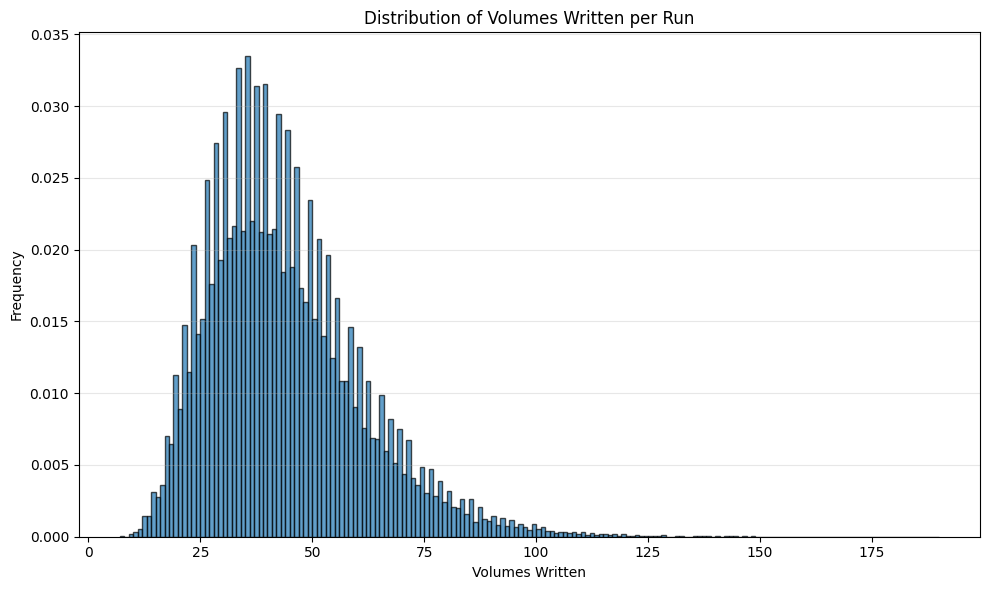

In [9]:
# Plot normalized distribution
volumes = [round(w/4000) for w in words_dist]
plt.figure(figsize=(10,6))
plt.hist(volumes, bins=range(min(volumes), max(volumes)+2), edgecolor='black', alpha=0.7, density=True)
plt.title("Distribution of Volumes Written per Run")
plt.xlabel("Volumes Written")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()